# CLASSIFICATION & REGRESSION MULTILAYER PERCEPTRON USING KERAS FUNCTIONAL API

_**Using Keras functional APIs to build both a deep and wide neural network showing the flexibilities that these APIs provides not just to make non-sequential neural networks but also to handle multiple input and outputs. As a deep learning model is usually a directed acyclic graph (DAG) of layers, the functional API provides a way to build such layers.**_

In [33]:
# Imports required packages

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import tensorflow as tf

import datetime
import matplotlib.pyplot as plt
import pprint    # For formatted print

## Loading Dataset

It skips the data analysis as it was already done in notebook [5.1_mlp_using_sklearn_practical_1.ipynb#Regression-MPLs](https://github.com/PradipKumarDas/Teaching/blob/master/22AML154-Advanced_Machine_Learning/5.1_mlp_using_sklearn_practical_1.ipynb#Regression-MPLs).

In [2]:
housing = fetch_california_housing()

# Considering the range of the house prices, each training instance is put into a bin
# to be used to split the dataset stratifically for each set to have equal distribution.
target_bin = pd.cut(housing.target, bins=[0, 1.0, 2.0, 3.0, 4.0, 6.0], labels=[1, 2, 3, 4, 5])

# Prepares training and testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42, stratify=target_bin)

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=42)

## Modeling using Keras Functional API

In [3]:
tf.keras.backend.clear_session()    # Reset the name counters
tf.random.set_seed(42)              # Sets the global random seed.

In [4]:
# Creates the (independent) layers

input_layer = tf.keras.layers.Input(shape=[8])
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [5]:
# Organizes the layers
# Note that a layer acts a function that can be called passing the input

normalized = normalization_layer(input_layer)  # Normalization layer to receive the data from input layer
hidden1 = hidden_layer1(normalized)            # 1st hidden layer to receive the data from the normalization layer's output
hidden2 = hidden_layer2(hidden1)               # 2nd hidden layer to receive data from the 1st hidden layer's output
concat = concat_layer([normalized, hidden2])   # Normalized input and output of 2nd hidden layer to concatenated column-wise
output = output_layer(concat)                  # Output layer to produce a single output by linearly combining the concatenated input

model = tf.keras.Model(inputs=[input_layer], outputs=[output])  # Creates a model specifying its input(s) and output(s)

2025-11-13 09:21:05.610246: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Shows the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

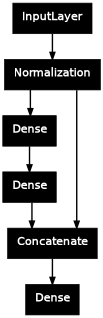

In [7]:
# Visualizes the model
tf.keras.utils.plot_model(model, dpi=50)

### Training the Model

In [8]:
# Compiles the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [9]:
# Fits the model
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.1449 - loss: 1.3108 - val_RootMeanSquaredError: 0.7583 - val_loss: 0.5751
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - RootMeanSquaredError: 0.7039 - loss: 0.4954 - val_RootMeanSquaredError: 0.6782 - val_loss: 0.4599
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - RootMeanSquaredError: 0.6425 - loss: 0.4128 - val_RootMeanSquaredError: 0.6281 - val_loss: 0.3945
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - RootMeanSquaredError: 0.6222 - loss: 0.3872 - val_RootMeanSquaredError: 0.6050 - val_loss: 0.3660
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - RootMeanSquaredError: 0.6070 - loss: 0.3685 - val_RootMeanSquaredError: 0.5937 - val_loss: 0.3525
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - RootMeanSquaredError: 0.5966 - loss: 0.3559 - val_RootMeanSquaredError: 0.5849 - val_loss: 0.3421
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - RootMeanSquaredError: 

### Evaluating the Model

In [10]:
# Evaluates the model
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - RootMeanSquaredError: 0.5571 - loss: 0.3103
[0.31031665205955505, 0.557060718536377]


In [11]:
# Takes first three instance from test set to make predictions
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1.8803754]
 [2.816202 ]
 [1.4663057]]


## Modeling to Handle Multiple Outputs

Shows the modeling approach if different subsets of input features are to be sent through the wide or deep paths. In this experiment, it sends 5 features (features 0 to 4) through wide path, and 6 features (features 2 to 7) through the deep path.

In [12]:
tf.keras.backend.clear_session()    # Reset the name counters
tf.random.set_seed(42)              # Sets the global random seed.

In [13]:
# Builds the layers

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()  # Normalization layer for 1st input
norm_layer_deep = tf.keras.layers.Normalization()  # Normalization layer for 2nd input

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)  # Normalized 2nd input to pass through the 1st hidden layer
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)    # Output of the 1st hidden layers to pass through the 2nd hidden layer

concat = tf.keras.layers.concatenate([norm_wide, hidden2])  # Concatenation layer to combine 1st normalized input and output of the 2nd hidden layer column-wise

output = tf.keras.layers.Dense(1)(concat)  # Output layer produces single output by linearly combining the concatenated data

model_2 = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])  # Creates a model specifying its input(s) and output(s)

In [14]:
# Compiles the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [15]:
# Shows the model summary
model_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 6)         │         13 │ input_layer_1[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        210 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 5)         │         11 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 35)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         36 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

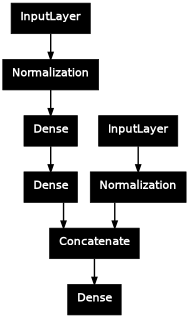

In [16]:
# Visualizes the mode
tf.keras.utils.plot_model(model_2, dpi=50)

### Training the Model

In [17]:
# Seperate data to send through two inputs

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_val_wide, X_val_deep = X_val[:, :5], X_val[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]

In [18]:
# Trains and evaluates the model


norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model_2.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_val_wide, X_val_deep), y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 1.3715 - loss: 1.8810 - val_RootMeanSquaredError: 0.8127 - val_loss: 0.6605
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - RootMeanSquaredError: 0.7336 - loss: 0.5382 - val_RootMeanSquaredError: 0.6903 - val_loss: 0.4765
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - RootMeanSquaredError: 0.6747 - loss: 0.4553 - val_RootMeanSquaredError: 0.6334 - val_loss: 0.4012
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - RootMeanSquaredError: 0.6431 - loss: 0.4135 - val_RootMeanSquaredError: 0.6168 - val_loss: 0.3805
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - RootMeanSquaredError: 0.6241 - loss: 0.3895 - val_RootMeanSquaredError: 0.6083 - val_loss: 0.3700
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - RootMeanSquaredError: 0.6128 - loss: 0.3755 - val_RootMeanSquaredError: 0.6040 - val_loss: 0.3648
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - RootMeanSquaredError: 

### Evaluating the Model

In [19]:
# Evaluates the model
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
mse_test = model_2.evaluate((X_test_wide, X_test_deep), y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - RootMeanSquaredError: 0.5782 - loss: 0.3343
[0.3342994451522827, 0.5781863331794739]


### Saving and Restoring the Model

In [20]:
# Saves the model
model_2.save("./models/my_MLP_regression_model.keras")

In [21]:
# Loads the model back
model_2 = tf.keras.models.load_model("./models/my_MLP_regression_model.keras")

In [22]:
# Makes predictions after model was loaded
y_pred = model_2.predict((X_test_wide, X_test_deep))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


### Using Callbacks

In [23]:
tf.keras.backend.clear_session()    # Reset the name counters
tf.random.set_seed(42)              # Sets the global random seed.

In [24]:
# Configures the checkpoint to save the model at the end of every epoch, if it's the best seen so far.
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "./models/checkpoints/mlp_regression_model.weights.h5",
    save_best_only=True,
    save_weights_only=True
)

In [25]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model_2.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                      validation_data=((X_val_wide, X_val_deep), y_val),
                      callbacks=[checkpoint_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5803 - loss: 0.3368 - val_RootMeanSquaredError: 0.5541 - val_loss: 0.3070
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5722 - loss: 0.3274 - val_RootMeanSquaredError: 0.5519 - val_loss: 0.3046
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - RootMeanSquaredError: 0.5705 - loss: 0.3254 - val_RootMeanSquaredError: 0.5519 - val_loss: 0.3046
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - RootMeanSquaredError: 0.5691 - loss: 0.3239 - val_RootMeanSquaredError: 0.5708 - val_loss: 0.3258
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - RootMeanSquaredError: 0.5719 - loss: 0.3270 - val_RootMeanSquaredError: 0.6599 - val_loss: 0.4355
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - RootMeanSquaredError: 0.5788 - loss: 0.3351 - val_RootMeanSquaredError: 0.5563 - val_loss: 0.3095
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - RootMeanSquaredError: 0.

The checkpoint file `mlp_regression_model.weights.h5` can be located in `./models/checkpoints/`.

### Early Stopping

Interrupting training when no progress is measured on the validation set for a specified number of epochs.
Also helps to avoid wasting time and resources, and to reduce overfitting, and also to roll back to the best model for cases when computer crashes.

In [26]:
tf.keras.backend.clear_session()    # Reset the name counters
tf.random.set_seed(42)              # Sets the global random seed.

In [27]:
# Configures early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10,    # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True    # Restores best model's weights 
)

In [28]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

# Fits the model with both checkpoint and early stopping callback set
history = model_2.fit((X_train_wide, X_train_deep), y_train, 
                      epochs=100,  # Set to higher number of epoch to demonstrate the early stopping functionality
                      validation_data=((X_val_wide, X_val_deep), y_val),
                      callbacks=[
                          checkpoint_cb,
                          early_stopping_cb    # Sets the newly added early stopping configuration
                      ])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5549 - loss: 0.3080 - val_RootMeanSquaredError: 0.5717 - val_loss: 0.3269
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - RootMeanSquaredError: 0.5566 - loss: 0.3098 - val_RootMeanSquaredError: 0.5693 - val_loss: 0.3241
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - RootMeanSquaredError: 0.5550 - loss: 0.3080 - val_RootMeanSquaredError: 0.5515 - val_loss: 0.3041
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - RootMeanSquaredError: 0.5523 - loss: 0.3050 - val_RootMeanSquaredError: 0.5463 - val_loss: 0.2985
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5513 - loss: 0.3039 - val_RootMeanSquaredError: 0.5494 - val_loss: 0.3018
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - RootMeanSquaredError: 0.5508 - loss: 0.3034 - val_RootMeanSquaredError: 0.5629 - val_loss: 0.3168
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - RootMeanSquaredEr

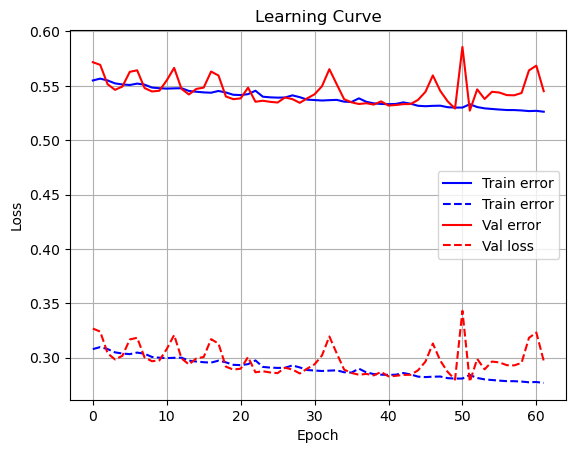

In [29]:
# Plots the learning curve

plt.plot(history.history["RootMeanSquaredError"], "b-", label="Train error")
plt.plot(history.history["loss"], "b--", label="Train error")
plt.plot(history.history["val_RootMeanSquaredError"], "r-", label="Val error")
plt.plot(history.history["val_loss"], "r--", label="Val loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.title("Learning Curve")
plt.legend()
plt.show()

### Using TensorBoard for Visualization
TensorBoard is a great interactive visualization tool to view the learning curves during training, compare curves and metrics between multiple runs, and more. In this experiment, its visualization feature for the learning curve will be used.

In [30]:
# Create log dir for TensorBoard to store logs
# Timestamp is used in naming subdirectory to seperate training experiments
log_dir = "./models/logs/" + datetime.datetime.now().strftime("%Y.%m.%d-%H:%M:%S")
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir)

In [31]:
tf.keras.backend.clear_session()    # Reset the name counters
tf.random.set_seed(42)              # Sets the global random seed.

In [32]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

# Fits the model with both checkpoint and early stopping callback set
history = model_2.fit((X_train_wide, X_train_deep), y_train, 
                      epochs=100,
                      validation_data=((X_val_wide, X_val_deep), y_val),
                      callbacks=[
                          checkpoint_cb,
                          early_stopping_cb,
                          tensorboard_cb      # Sets the newly added TensorBoard configuration
                      ])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5315 - loss: 0.2825 - val_RootMeanSquaredError: 0.5388 - val_loss: 0.2903
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5295 - loss: 0.2803 - val_RootMeanSquaredError: 0.5402 - val_loss: 0.2918
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5287 - loss: 0.2795 - val_RootMeanSquaredError: 0.5482 - val_loss: 0.3005
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5282 - loss: 0.2790 - val_RootMeanSquaredError: 0.5429 - val_loss: 0.2947
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5280 - loss: 0.2787 - val_RootMeanSquaredError: 0.5450 - val_loss: 0.2970
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5276 - loss: 0.2783 - val_RootMeanSquaredError: 0.5395 - val_loss: 0.2911
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.527


The following magic command loads TensorBoard directly into the Jupyter.

`%load_ext tensorboard`

`%tensorboard --logdir ./models/logs --port 6006 --bind_all`

TensorBoard can also be accessed through browser by executing the following command in the terminal.

`tensorboard --logdir ./models/logs --port 6006 --bind_all`

In [33]:
%load_ext tensorboard

In [34]:
# Note that the following commmand make take few seconds to load the TensorBoard
%tensorboard --logdir ./models/logs --port 6006 --bind_all

## Fine-Tuning Neural Network Hyperparameters

Using _KerasTuner_ is an easy-to-use, scalable hyperparameter optimization framework is used to find combination of hyperparameters (e.g. number of layers, the number of neurons and the type of activation function to use in each layer, the weight initialization logic, the type of optimizer to use, its learning rate, the batch size, and many more) best for the model for the task in hand. It easily configures the search space and leverages one of the available search algorithms to find the best hyperparameter values for the model. KerasTuner comes with Bayesian Optimization, Hyperband, and Random Search algorithms built-in.

In [1]:
import keras_tuner as kt

2025-11-14 03:58:27.505247: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-14 03:58:27.505667: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-14 03:58:27.560706: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-14 03:58:28.843087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [11]:
# Loads  the fashion dataset
(X_train_full, y_train_full), (X_test, y_test)  = tf.keras.datasets.fashion_mnist.load_data()

# Takes out validation dataset from training dataset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

# Scales the training, validation and testing data
X_train_scaled, X_val_scaled, X_test_scaled = X_train/255., X_val/255., X_test/255.

### Configuring Keras Tuner

In [17]:
def build_model(hp):
    """
    A callable that takes hyperparameters and returns a model instance
    """
    
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)    # Possible number of hidden layers in a network
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)          # Possible number of neurons in a hidden layer
    
    learning_rate = hp.Float("learning_rate", min_value=1e-4,             # A range for learning rate
                             max_value=1e-2, sampling="log")
    
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])            # Options for optimizer
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Builds the model from the above hyperparameters
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())    # Adds layer to flatten 2-D input
    
    for _ in range(n_hidden):               # Create hidden layers (count depends of current value of `n_hidden`)
        model.add(tf.keras.layers.Dense(
            n_neurons,                      # For each hidden layer, adds `n_neurons` number of neurons
            activation="relu"))  
    model.add(tf.keras.layers.Dense(10, activation="softmax"))  # Adds 10-neuron based dense layer with softmax layer to predict class the sample belongs to
    model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=optimizer,      # Select the optimizer based current value of `optimizer`
                  metrics=["accuracy"]      # Metric to check model prediction performance
                 )
    
    return model

In [18]:
# Initializes basic random search-based hyperparameter tuner

random_search_tuner = kt.RandomSearch(
    build_model,                       # Makes calls to receive a model instance with different hyperparameters each time
    objective="val_accuracy",          # Metric for tuner to maximize 
    max_trials=10,                     # Total number of trials (model configurations) to test at most
    directory="./models/tuning",       # A directory for storing the search results
    project_name="my_fashion_mnist",   # Name to use as prefix for files saved by this Tuner.
    overwrite=True,                    #  Overwrites tuning project files
    seed=42                            # A seed for reproducibility
)  

In [19]:
tf.keras.backend.clear_session()    # Reset the name counters
tf.random.set_seed(42)              # Sets the global random seed.

### Searching for Best Hyperparameters

In [20]:
# Performs searching for best hyperparameters.
random_search_tuner.search(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Trial 10 Complete [00h 01m 12s]
val_accuracy: 0.8889999985694885

Best val_accuracy So Far: 0.8989999890327454
Total elapsed time: 00h 11m 01s


In [44]:
# Gets the best model
best_model = random_search_tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 124)            │        97,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 124)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 124)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 124)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 124)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 124)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 124)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,590 (748.40 KB)

 Trainable params: 191,590 (748.40 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Gets the best hyperparameters
best_params = random_search_tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
pprint.pprint(best_params.values)

Best hyperparameters:
{'learning_rate': 0.0005509513888645584,
 'n_hidden': 7,
 'n_neurons': 124,
 'optimizer': 'adam'}


### Retraining & Evaluating the Best Model

In [46]:
# Training can be continued (retraining) for a few epochs on the full training set
best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9097 - loss: 0.2510
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9139 - loss: 0.2395
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9156 - loss: 0.2275
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9162 - loss: 0.2224
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9179 - loss: 0.2196
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9187 - loss: 0.2185
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9203 - loss: 0.2136
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9201 - loss: 0.2178
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9212 - loss: 0.2103
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9229 - loss: 0.2089


In [47]:
# Finally, evaluates the model on test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8800 - loss: 0.3730
0.8799999952316284


## Observations

_Write your observations about the above experiments using Keras functional APIs._